In [1]:
##Importing Necessary Libraries and Python Magic###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Reading in data##
kick_data = pd.read_csv('kick_stat.csv')
kick_data.head()

,Name,Team,FG,1-19,20-29,30-39,40-49,50+,Unnamed: 8
0,Tevye Schuettpelz-Rohl,AFA,5/9,0/0,0/0,3/6,2/3,0/0,NaN
1,Cory Smigel,AKR,4/6,0/0,1/1,2/3,1/1,0/1,NaN
2,Will Reichard,ALA,12/12,0/0,4/4,5/5,2/2,1/1,NaN
3,Chandler Staton,APP,13/19,0/0,1/2,8/11,4/5,0/1,NaN
4,Lucas Havrisik,ARIZ,6/7,0/0,2/2,2/2,1/2,1/1,NaN


In [2]:
##Removing last column via list .pop()##
cols = kick_data.columns.tolist()
cols.pop()
cols_v2 = cols
cols_v2

##Changing columns##
kick_data = kick_data[cols_v2]

kick_data.head()

,Name,Team,FG,1-19,20-29,30-39,40-49,50+
0,Tevye Schuettpelz-Rohl,AFA,5/9,0/0,0/0,3/6,2/3,0/0
1,Cory Smigel,AKR,4/6,0/0,1/1,2/3,1/1,0/1
2,Will Reichard,ALA,12/12,0/0,4/4,5/5,2/2,1/1
3,Chandler Staton,APP,13/19,0/0,1/2,8/11,4/5,0/1
4,Lucas Havrisik,ARIZ,6/7,0/0,2/2,2/2,1/2,1/1


Below, we'll try to split the yardage coluns into two columns for makes and attempts

In [3]:
##Splitting all columns into two columns around the / character##
kick_data[['FGM', 'FGA']] = kick_data.FG.str.split('/', expand=True)
kick_data[['1-19M','1-19A']] = kick_data['1-19'].str.split('/', expand=True)
kick_data[['20-29M','20-29A']] = kick_data['20-29'].str.split('/', expand=True)
kick_data[['30-39M','30-39A']] = kick_data['30-39'].str.split('/', expand=True)
kick_data[['40-49M','40-49A']] = kick_data['40-49'].str.split('/', expand=True)
kick_data[['50+M','50+A']] = kick_data['50+'].str.split('/', expand=True)


kick_data.drop(['FG',
 '1-19',
 '20-29',
 '30-39',
 '40-49',
 '50+'], axis=1, inplace=True)

kick_data.drop(kick_data.tail(1).index, inplace=True)

##Ensuring Success##
kick_data.tail()

,Name,Team,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A
105,Collin Larsh,WIS,5,7,1,1,2,2,2,2,0,2,0,0
106,Brayden Narveson,WKU,13,14,0,0,1,1,5,5,6,6,1,2
107,Thiago Kapps,WMU,4,7,0,0,1,2,1,2,1,2,1,1
108,Evan Staley,WVU,6,9,1,1,0,1,3,3,2,3,0,1
109,John Hoyland,WYO,13,14,0,0,5,5,6,7,2,2,0,0


Now we need to total the columns to get our expected proportions/values

In [4]:
##Convering to int type for .sum() method##
kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']] = kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']].astype('int64')

##Creating series of totals##
total = kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']].sum()
print(total)

FGM       1055
FGA       1416
1-19M       10
1-19A       10
20-29M     344
20-29A     387
30-39M     343
30-39A     439
40-49M     290
40-49A     447
50+M        68
50+A       144
dtype: int64


In [5]:
##Using .loc to create a new bottom row#
columns_totaled = ['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']
for c in columns_totaled:
    kick_data.loc['Total', c] = kick_data[c].sum()
    
##Reconverting to int64##
kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']] = kick_data[['FGM', 'FGA', '1-19M', '1-19A', '20-29M', '20-29A','30-39M', '30-39A', '40-49M', '40-49A', '50+M', '50+A']].astype('int64')

kick_data

,Name,Team,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A
0,Tevye Schuettpelz-Rohl,AFA,5,9,0,0,0,0,3,6,2,3,0,0
1,Cory Smigel,AKR,4,6,0,0,1,1,2,3,1,1,0,1
2,Will Reichard,ALA,12,12,0,0,4,4,5,5,2,2,1,1
3,Chandler Staton,APP,13,19,0,0,1,2,8,11,4,5,0,1
4,Lucas Havrisik,ARIZ,6,7,0,0,2,2,2,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Brayden Narveson,WKU,13,14,0,0,1,1,5,5,6,6,1,2
107,Thiago Kapps,WMU,4,7,0,0,1,2,1,2,1,2,1,1
108,Evan Staley,WVU,6,9,1,1,0,1,3,3,2,3,0,1
109,John Hoyland,WYO,13,14,0,0,5,5,6,7,2,2,0,0


Now that we have totals, we will create proportions of successful kicks by yardage in order to get expected values.

In [6]:
##Creating second DataFrame with proportions##

conversion_rates = {}

conversion_rates['1-19'] = round((kick_data.loc['Total', '1-19M'] / kick_data.loc['Total', '1-19A']),4) * 100
conversion_rates['20-29'] = round((kick_data.loc['Total', '20-29M'] / kick_data.loc['Total', '20-29A']),4) * 100
conversion_rates['30-39'] = round((kick_data.loc['Total', '30-39M'] / kick_data.loc['Total', '30-39A']),4) * 100
conversion_rates['40-49'] = round((kick_data.loc['Total', '40-49M'] / kick_data.loc['Total', '40-49A']),4) * 100
conversion_rates['50+'] = round((kick_data.loc['Total', '50+M'] / kick_data.loc['Total', '50+A']),4) * 100

conversion_rates

{'1-19': 100.0,
 '20-29': 88.89,
 '30-39': 78.13,
 '40-49': 64.88000000000001,
 '50+': 47.22}

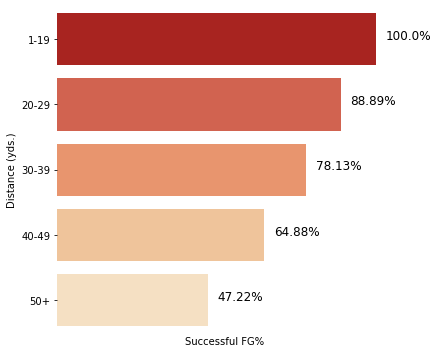

In [7]:
conversion_cols = ['1-19', '20-29', '30-39', '40-49', '50+']
conversion_results = [100.0, 88.89, 78.13, 64.88, 47.22]

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=[round(i,1) for i in conversion_results], y=conversion_cols, orient='h', palette='OrRd_r')

sns.despine(left=True, bottom=True)
sns.set_context('poster', font_scale=.5)
ax.set_xlabel('Successful FG%')
ax.set_ylabel('Distance (yds.)')
ax.set_xticks([])
for i, v in enumerate(conversion_results):
    ax.text(v + 3, i, str(v) + '%', color='black', fontweight='ultralight')
plt.savefig('Bar_of_results')

In [8]:
##Determining Expected Values##
#Multiplying by .03, number of points for a field goal, accounting for above percentage)
expected_values = {}
for i in conversion_rates:
    expected_values[i] = round(conversion_rates[i] * .03,3)
expected_values

{'1-19': 3.0, '20-29': 2.667, '30-39': 2.344, '40-49': 1.946, '50+': 1.417}

In [9]:
##Tabulating Added value by yardage
kick_data['1-19AV'] =(3*kick_data['1-19M']) - (3*kick_data['1-19A'])
kick_data['20-29AV'] = (3*kick_data['20-29M']) - (2.667*kick_data['20-29A'])
kick_data['30-39AV'] = (3*kick_data['30-39M']) - (2.344*kick_data['30-39A'])
kick_data['40-49AV'] = (3*kick_data['40-49M']) - (1.946*kick_data['40-49A'])
kick_data['50+AV'] = (3*kick_data['50+M']) - (1.417*kick_data['50+A'])

##Changing dtype of 1-19 to Float, all zero##
kick_data['1-19AV'] = kick_data['1-19AV'].astype(float)

##Summing all AV columns##
kick_data['Total Added Value'] = kick_data[['1-19AV', '20-29AV', '30-39AV', '40-49AV', '50+AV']].sum(axis=1)

In [10]:
##Allowing for full dataset view##
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Dropping last column before graphing
kick_data.drop(kick_data.tail(1).index, inplace=True)

kick_data

,Name,Team,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A,1-19AV,20-29AV,30-39AV,40-49AV,50+AV,Total Added Value
0,Tevye Schuettpelz-Rohl,AFA,5,9,0,0,0,0,3,6,2,3,0,0,0.0,0.000,-5.064,0.162,0.000,-4.902
1,Cory Smigel,AKR,4,6,0,0,1,1,2,3,1,1,0,1,0.0,0.333,-1.032,1.054,-1.417,-1.062
2,Will Reichard,ALA,12,12,0,0,4,4,5,5,2,2,1,1,0.0,1.332,3.280,2.108,1.583,8.303
3,Chandler Staton,APP,13,19,0,0,1,2,8,11,4,5,0,1,0.0,-2.334,-1.784,2.270,-1.417,-3.265
4,Lucas Havrisik,ARIZ,6,7,0,0,2,2,2,2,1,2,1,1,0.0,0.666,1.312,-0.892,1.583,2.669
5,A.J. Reed,ARK,7,11,0,0,4,5,2,2,1,4,0,0,0.0,-1.335,1.312,-4.784,0.000,-4.807
6,Blake Grupe,ARST,11,18,0,0,2,5,5,6,4,7,0,0,0.0,-7.335,0.936,-1.622,0.000,-8.021
7,Anders Carlson,AUB,18,20,0,0,7,7,5,6,5,5,1,2,0.0,2.331,0.936,5.270,0.166,8.703
8,Jack Knight,BALL,8,12,0,0,1,1,5,7,2,3,0,1,0.0,0.333,-1.408,0.162,-1.417,-2.330
9,John Mayers,BAY,10,15,0,0,5,5,2,2,3,8,0,0,0.0,1.665,1.312,-6.568,0.000,-3.591


In [11]:
abs_value = {}
yardages = ['1-19', '20-29', '30-39', '40-49', '50+']
for i in yardages:
    abs_value[i] = abs(kick_data[i+'AV']).sum()
print(abs_value)

{'1-19': 0.0, '20-29': 162.633, '30-39': 196.576, '40-49': 248.43, '50+': 135.166}


In [12]:
sorted_data = kick_data.sort_values('Total Added Value', ascending=False)
sorted_ten = sorted_data[sorted_data['FGA'] > 10]

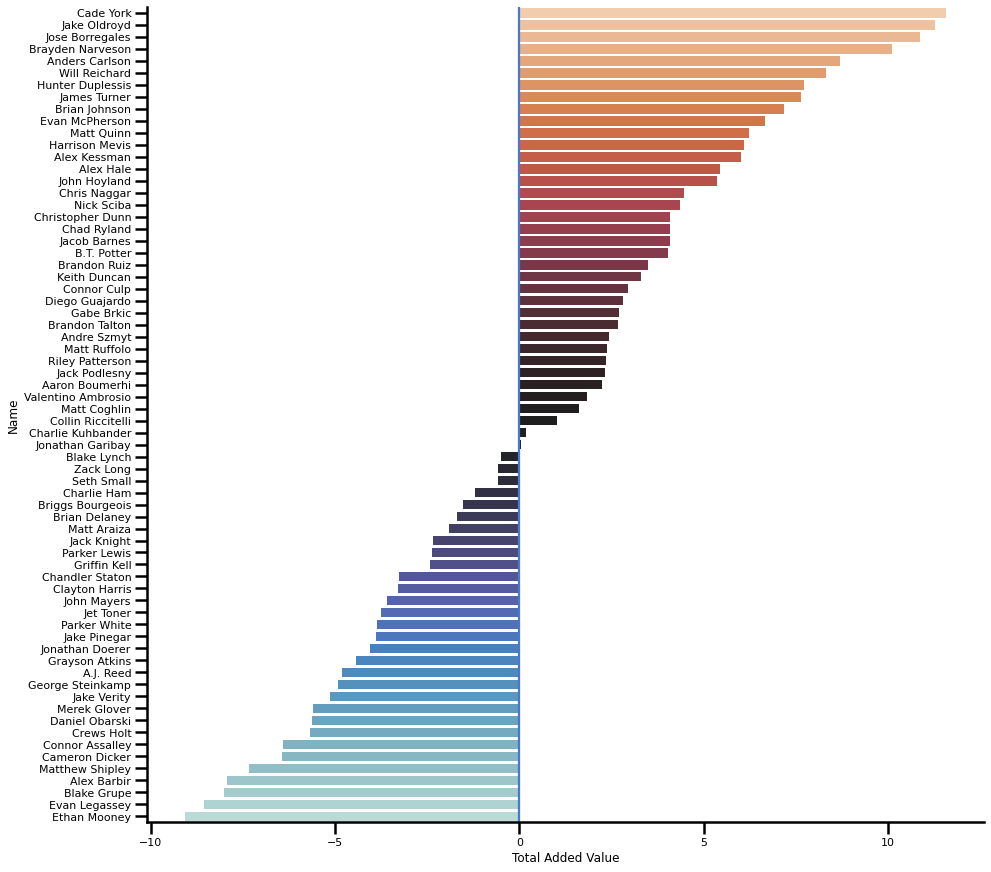

In [13]:
import matplotlib.style as style
##Setting style, size##
style.use('seaborn-muted')
fig, ax = plt.subplots(figsize=(15,15))
    
##Creating the barplot##'
ax = sns.barplot(x="Total Added Value", y="Name", data=sorted_ten, orient='h', palette='icefire_r')
##Additional Formatting##
sns.despine()
sns.set_context('talk', font_scale=.5)  #Everything is large

plt.axvline(0, 0,1, ls='-')
font = {'size'   : 22}

plt.rc('font', **font)

plt.savefig('ValuePlot10.png')

<ipython-input-14-73a01bde9c1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_ten['Normalized'] = normalized_value


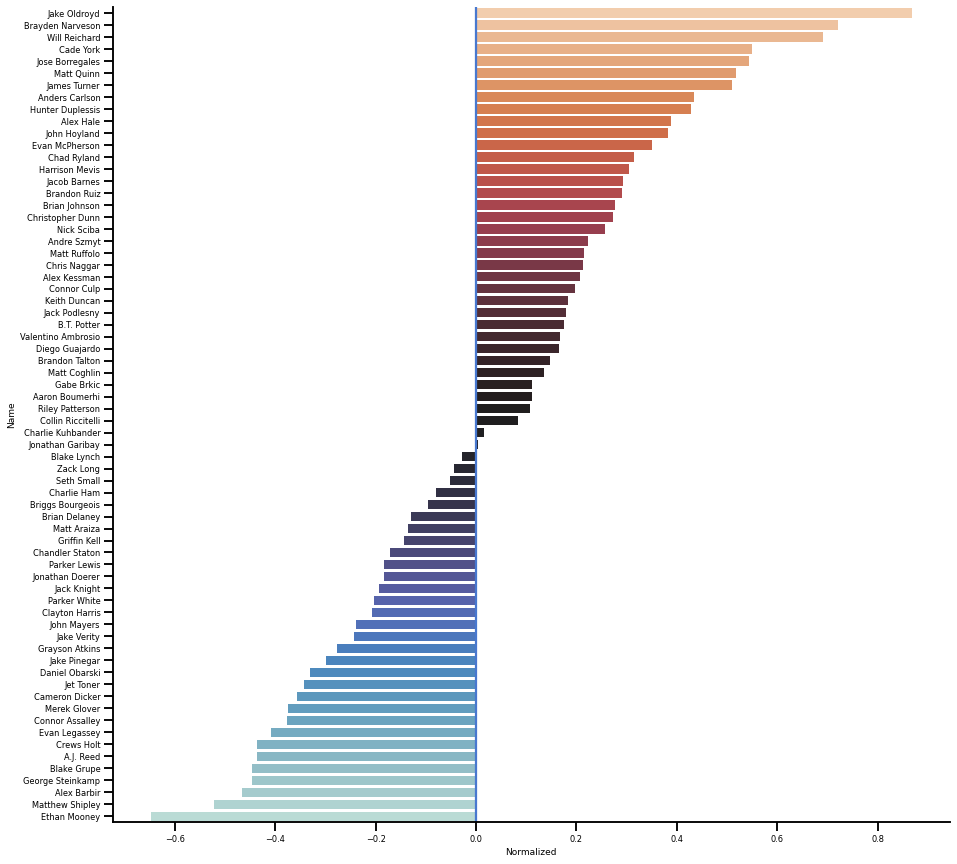

In [14]:
normalized_value = sorted_ten['Total Added Value'] / sorted_ten["FGA"]
sorted_ten['Normalized'] = normalized_value
sorted_normal = sorted_ten.sort_values('Normalized', ascending=False)

##Setting style, size##
style.use('seaborn-muted')
fig, ax = plt.subplots(figsize=(15,15))
    
##Creating the barplot##'
ax = sns.barplot(x="Normalized", y="Name", data=sorted_normal, orient='h', palette='icefire_r')
##Additional Formatting##
sns.despine()
sns.set_context('talk', font_scale=.5)  #Everything is larger

plt.axvline(0, 0,1, ls='-')
font = {'size'   : 22}

plt.rc('font', **font)

plt.savefig('ValuePlot10normal.png')

In [15]:
sorted_ten.to_csv('sorted_ten_v2.csv')

In [16]:
%%capture
%load_ext sql
%sql sqlite:///kick_db.db

In [17]:
%%sql
SELECT Name, Team, ROUND(TotalAddedValue,3) points_added
  FROM sorted_ten_v2
 ORDER BY points_added DESC
LIMIT 10;

 * sqlite:///kick_db.db
Done.


Name,Team,points_added
Cade York,LSU,11.565
Jake Oldroyd,BYU,11.286
Jose Borregales,MIA,10.866
Brayden Narveson,WKU,10.103
Anders Carlson,AUB,8.703
Will Reichard,ALA,8.303
Hunter Duplessis,UTSA,7.714
James Turner,UL,7.642
Brian Johnson,VT,7.179
Evan McPherson,FLOR,6.649


In [18]:
%%sql
SELECT Name, Team, ROUND(Normalized, 3) ppk
  FROM sorted_ten_v2
 ORDER BY ppk DESC
LIMIT 10;

 * sqlite:///kick_db.db
Done.


Name,Team,ppk
Jake Oldroyd,BYU,0.868
Brayden Narveson,WKU,0.722
Will Reichard,ALA,0.692
Cade York,LSU,0.551
Jose Borregales,MIA,0.543
Matt Quinn,UAB,0.518
James Turner,UL,0.509
Anders Carlson,AUB,0.435
Hunter Duplessis,UTSA,0.429
Alex Hale,OKST,0.388


In [19]:
%%sql
SELECT Name, Team, ROUND(TotalAddedValue,3) points_added
  FROM sorted_ten_v2
 ORDER BY points_added ASC
 LIMIT 10;

 * sqlite:///kick_db.db
Done.


Name,Team,points_added
Ethan Mooney,UNT,-9.072
Evan Legassey,TROY,-8.566
Blake Grupe,ARST,-8.021
Alex Barbir,LIB,-7.942
Matthew Shipley,HAW,-7.322
Cameron Dicker,TEX,-6.428
Connor Assalley,ISU,-6.398
Crews Holt,MTSU,-5.67
Daniel Obarski,UCF,-5.636
Merek Glover,TULN,-5.608


In [20]:
%%sql
SELECT Name, Team, ROUND(Normalized, 3) ppk
  FROM sorted_ten_v2
 ORDER BY ppk ASC
 LIMIT 10;

 * sqlite:///kick_db.db
Done.


Name,Team,ppk
Ethan Mooney,UNT,-0.648
Matthew Shipley,HAW,-0.523
Alex Barbir,LIB,-0.467
George Steinkamp,NM,-0.446
Blake Grupe,ARST,-0.446
A.J. Reed,ARK,-0.437
Crews Holt,MTSU,-0.436
Evan Legassey,TROY,-0.408
Connor Assalley,ISU,-0.376
Merek Glover,TULN,-0.374


In [21]:
%%sql

SELECT AVG(FGA)
  FROM sorted_ten_v2
 WHERE name = (SELECT Name
                  FROM sorted_ten_v2
                 LIMIT 10
              );

 * sqlite:///kick_db.db
Done.


AVG(FGA)
21.0


In [22]:
%%sql

SELECT AVG(FGA-FGM) misses
  FROM sorted_ten_v2
 WHERE TotalAddedValue < 0;

 * sqlite:///kick_db.db
Done.


misses
5.193548387096774


In [23]:
%%sql
SELECT AVG(FGA-FGM) misses
 FROM sorted_ten_v2
 WHERE TotalAddedValue > 0;

 * sqlite:///kick_db.db
Done.


misses
2.864864864864865


In [24]:
%%sql
SELECT Name, FGA - FGM Misses
 FROM sorted_ten_v2
ORDER BY 2 DESC
 LIMIT 10;

 * sqlite:///kick_db.db
Done.


Name,Misses
Parker White,8
Evan Legassey,8
Riley Patterson,7
Jonathan Doerer,7
Jake Verity,7
Alex Barbir,7
Blake Grupe,7
Ethan Mooney,7
Brian Johnson,6
Alex Kessman,6


In [27]:
%%sql
SELECT Name, '30-39A' - '30-39M'
 FROM sorted_ten_v2
ORDER BY 2 ASC
LIMIT 10;

 * sqlite:///kick_db.db
Done.


Name,'30-39A' - '30-39M'
Cade York,0
Jake Oldroyd,0
Jose Borregales,0
Brayden Narveson,0
Anders Carlson,0
Will Reichard,0
Hunter Duplessis,0
James Turner,0
Brian Johnson,0
Evan McPherson,0


In [28]:
sorted_ten

,Name,Team,FGM,FGA,1-19M,1-19A,20-29M,20-29A,30-39M,30-39A,40-49M,40-49A,50+M,50+A,1-19AV,20-29AV,30-39AV,40-49AV,50+AV,Total Added Value,Normalized
40,Cade York,LSU,18,21,0,0,4,4,5,6,3,4,6,7,0.0,1.332,0.936,1.216,8.081,11.565,0.550714
13,Jake Oldroyd,BYU,13,13,0,0,5,5,1,1,4,4,3,3,0.0,1.665,0.656,4.216,4.749,11.286,0.868154
44,Jose Borregales,MIA,18,20,0,0,4,4,6,6,6,8,2,2,0.0,1.332,3.936,2.432,3.166,10.866,0.543300
106,Brayden Narveson,WKU,13,14,0,0,1,1,5,5,6,6,1,2,0.0,0.333,3.280,6.324,0.166,10.103,0.721643
7,Anders Carlson,AUB,18,20,0,0,7,7,5,6,5,5,1,2,0.0,2.331,0.936,5.270,0.166,8.703,0.435150
2,Will Reichard,ALA,12,12,0,0,4,4,5,5,2,2,1,1,0.0,1.332,3.280,2.108,1.583,8.303,0.691917
99,Hunter Duplessis,UTSA,16,18,0,0,6,6,5,5,4,5,1,2,0.0,1.998,3.280,2.270,0.166,7.714,0.428556
88,James Turner,UL,13,15,0,0,3,3,4,4,5,5,1,3,0.0,0.999,2.624,5.270,-1.251,7.642,0.509467
102,Brian Johnson,VT,20,26,1,1,4,4,4,5,8,9,3,7,0.0,1.332,0.280,6.486,-0.919,7.179,0.276115
28,Evan McPherson,FLOR,15,19,0,0,3,3,6,6,2,4,4,6,0.0,0.999,3.936,-1.784,3.498,6.649,0.349947
